<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Apr 18 22:14:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.8.0+cu126


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [2]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
# Setup train and testing paths
train_path = image_path / "train"
test_path = image_path / "test"

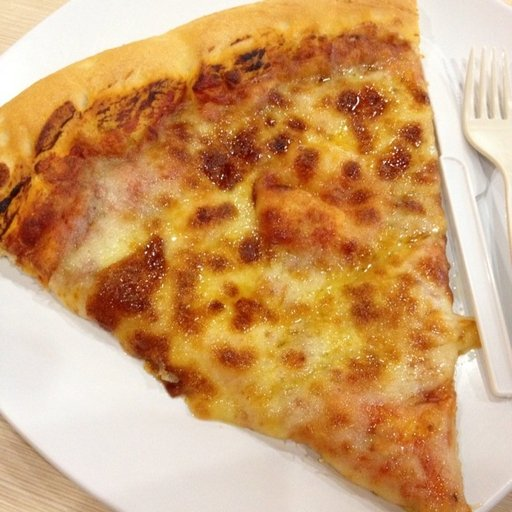

In [11]:
# Visualize an image
torch.manual_seed(42)
import random
from PIL import Image


images = list(image_path.glob("*/*/*.jpg"))
random_image = random.choice(images)

img = Image.open(random_image)
img

In [7]:
# Do the image visualization with matplotlib


We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [15]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms

data_transform  = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ]
)


In [9]:
# Write transform for turning images into tensors


In [10]:
# Write a function to plot transformed images


### Load image data using `ImageFolder`

In [16]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(
    root=train_path,
    transform=data_transform,
    
)
test_data = datasets.ImageFolder(
    root=test_path,
    transform=data_transform
)

In [17]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [20]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader,Dataset

train_dataloader = DataLoader(dataset=train_data,shuffle=True,batch_size=32)
test_dataloader = DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [21]:
# How many batches of images are in our data loaders?


32

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [68]:
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=20,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20,out_channels=20,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=20,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20,out_channels=20,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*16*20,out_features=3)
        )
    def forward(self,x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x
    

model = TinyVGG().to(device=device)

In [69]:
from torchinfo import summary
summary(model,input_size=(32,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 20, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 20, 64, 64]          560
│    └─ReLU: 2-2                         [32, 20, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 20, 64, 64]          3,620
│    └─ReLU: 2-4                         [32, 20, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 20, 32, 32]          --
├─Sequential: 1-2                        [32, 20, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 20, 32, 32]          3,620
│    └─ReLU: 2-7                         [32, 20, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 20, 32, 32]          3,620
│    └─ReLU: 2-9                         [32, 20, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 20, 16, 16]          --
├─Seq

## 4. Create training and testing functions for `model_0`.

In [62]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for data in dataloader:
    x,y = data
    
    # Send data to target device
    x,y = x.to(device),y.to(device)   
    # 1. Forward pass
    y_logits = model(x)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits,y)

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    acc = (y_pred == y).sum().item() / len(y)

    train_loss += loss.item()
    train_acc += acc
  

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader) 
  return train_loss, train_acc

In [63]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for x,y in dataloader:
      # Send data to target device
      x,y = x.to(device),y.to(device)   

      # 1. Forward pass
      y_logits = model(x)
      y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_logits,y)
      test_loss += loss.item() 

      # Calculate and accumulate accuracy
      acc = (y_pred == y).sum().item() / len(y)
      test_acc += acc
  # Adjust metrics to get average loss and accuracy per batch
  test_acc /= len(dataloader)
  test_loss /= len(dataloader)
  return test_loss, test_acc

In [64]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [65]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(#TODO,
    params=model.parameters() ,
                             lr=0.001)

train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=5)

 20%|██        | 1/5 [00:00<00:03,  1.01it/s]

Epoch: 1 | train_loss: 1.0975 | train_acc: 0.2500 | test_loss: 1.0915 | test_acc: 0.3314


 40%|████      | 2/5 [00:01<00:02,  1.04it/s]

Epoch: 2 | train_loss: 1.0943 | train_acc: 0.3242 | test_loss: 1.1005 | test_acc: 0.3021


 60%|██████    | 3/5 [00:02<00:01,  1.05it/s]

Epoch: 3 | train_loss: 1.0762 | train_acc: 0.4375 | test_loss: 1.0568 | test_acc: 0.3712


 80%|████████  | 4/5 [00:03<00:00,  1.05it/s]

Epoch: 4 | train_loss: 1.0547 | train_acc: 0.3945 | test_loss: 1.0545 | test_acc: 0.2917


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

Epoch: 5 | train_loss: 1.0525 | train_acc: 0.4453 | test_loss: 1.0629 | test_acc: 0.4138


{'train_loss': [1.0974775403738022,
  1.0943321883678436,
  1.0761606246232986,
  1.0546617805957794,
  1.0524975880980492],
 'train_acc': [0.25, 0.32421875, 0.4375, 0.39453125, 0.4453125],
 'test_loss': [1.0914530754089355,
  1.100523869196574,
  1.05678125222524,
  1.054530660311381,
  1.0628829797108967],
 'test_acc': [0.331439393939394,
  0.3020833333333333,
  0.37121212121212127,
  0.2916666666666667,
  0.41382575757575757]}

In [66]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(#TODO, 
    params=model.parameters() ,
                             lr=0.001)
train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=20)

  5%|▌         | 1/20 [00:00<00:18,  1.01it/s]

Epoch: 1 | train_loss: 0.9439 | train_acc: 0.5312 | test_loss: 1.0169 | test_acc: 0.3722


 10%|█         | 2/20 [00:01<00:17,  1.03it/s]

Epoch: 2 | train_loss: 0.8933 | train_acc: 0.6289 | test_loss: 1.0802 | test_acc: 0.4025


 15%|█▌        | 3/20 [00:02<00:16,  1.03it/s]

Epoch: 3 | train_loss: 0.8776 | train_acc: 0.6680 | test_loss: 0.9464 | test_acc: 0.4536


 20%|██        | 4/20 [00:03<00:15,  1.04it/s]

Epoch: 4 | train_loss: 0.8943 | train_acc: 0.6328 | test_loss: 1.0016 | test_acc: 0.4744


 25%|██▌       | 5/20 [00:04<00:14,  1.04it/s]

Epoch: 5 | train_loss: 0.9516 | train_acc: 0.4883 | test_loss: 1.0359 | test_acc: 0.4347


 30%|███       | 6/20 [00:05<00:13,  1.05it/s]

Epoch: 6 | train_loss: 0.8084 | train_acc: 0.6328 | test_loss: 1.1190 | test_acc: 0.3333


 35%|███▌      | 7/20 [00:06<00:12,  1.04it/s]

Epoch: 7 | train_loss: 0.9390 | train_acc: 0.4961 | test_loss: 0.9734 | test_acc: 0.4536


 40%|████      | 8/20 [00:07<00:11,  1.01it/s]

Epoch: 8 | train_loss: 0.8307 | train_acc: 0.6992 | test_loss: 0.9439 | test_acc: 0.5350


 45%|████▌     | 9/20 [00:08<00:10,  1.02it/s]

Epoch: 9 | train_loss: 0.9145 | train_acc: 0.5742 | test_loss: 1.0062 | test_acc: 0.4432


 50%|█████     | 10/20 [00:09<00:09,  1.03it/s]

Epoch: 10 | train_loss: 0.7168 | train_acc: 0.7188 | test_loss: 0.9273 | test_acc: 0.4839


 55%|█████▌    | 11/20 [00:10<00:08,  1.03it/s]

Epoch: 11 | train_loss: 0.8076 | train_acc: 0.7188 | test_loss: 0.9303 | test_acc: 0.5057


 60%|██████    | 12/20 [00:11<00:07,  1.04it/s]

Epoch: 12 | train_loss: 0.8278 | train_acc: 0.6094 | test_loss: 0.9632 | test_acc: 0.4536


 65%|██████▌   | 13/20 [00:12<00:06,  1.04it/s]

Epoch: 13 | train_loss: 0.7358 | train_acc: 0.6523 | test_loss: 1.0450 | test_acc: 0.4034


 70%|███████   | 14/20 [00:13<00:05,  1.03it/s]

Epoch: 14 | train_loss: 0.7509 | train_acc: 0.6992 | test_loss: 1.0287 | test_acc: 0.4441


 75%|███████▌  | 15/20 [00:14<00:04,  1.03it/s]

Epoch: 15 | train_loss: 0.7093 | train_acc: 0.7070 | test_loss: 0.9978 | test_acc: 0.4441


 80%|████████  | 16/20 [00:15<00:03,  1.03it/s]

Epoch: 16 | train_loss: 0.7749 | train_acc: 0.5781 | test_loss: 0.9615 | test_acc: 0.5161


 85%|████████▌ | 17/20 [00:16<00:02,  1.04it/s]

Epoch: 17 | train_loss: 0.7014 | train_acc: 0.6523 | test_loss: 0.8823 | test_acc: 0.5966


 90%|█████████ | 18/20 [00:17<00:01,  1.02it/s]

Epoch: 18 | train_loss: 0.6729 | train_acc: 0.7227 | test_loss: 1.0603 | test_acc: 0.3920


 95%|█████████▌| 19/20 [00:18<00:00,  1.02it/s]

Epoch: 19 | train_loss: 0.6942 | train_acc: 0.6836 | test_loss: 0.9925 | test_acc: 0.4451


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]

Epoch: 20 | train_loss: 0.6478 | train_acc: 0.7422 | test_loss: 0.9836 | test_acc: 0.4451


{'train_loss': [0.9438579007983208,
  0.8933006227016449,
  0.8776305988430977,
  0.8942647203803062,
  0.9515572190284729,
  0.8083628937602043,
  0.9390137046575546,
  0.8307126760482788,
  0.9145021066069603,
  0.7167899957858026,
  0.8076161220669746,
  0.8277670294046402,
  0.7357864677906036,
  0.7508853562176228,
  0.709276769310236,
  0.7748582139611244,
  0.7014223840087652,
  0.6729121990501881,
  0.6941611357033253,
  0.6477571707218885],
 'train_acc': [0.53125,
  0.62890625,
  0.66796875,
  0.6328125,
  0.48828125,
  0.6328125,
  0.49609375,
  0.69921875,
  0.57421875,
  0.71875,
  0.71875,
  0.609375,
  0.65234375,
  0.69921875,
  0.70703125,
  0.578125,
  0.65234375,
  0.72265625,
  0.68359375,
  0.7421875],
 'test_loss': [1.016892433166504,
  1.080245812733968,
  0.9463818470637003,
  1.0016492406527202,
  1.0358744859695435,
  1.1189837058385212,
  0.973417599995931,
  0.9439480304718018,
  1.0062104264895122,
  0.9272756775220236,
  0.9302690029144287,
  0.963195582230

In [67]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(#TODO, 
    params=model.parameters() ,
                             lr=0.001)
train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=50)

  2%|▏         | 1/50 [00:01<00:49,  1.00s/it]

Epoch: 1 | train_loss: 0.6577 | train_acc: 0.7383 | test_loss: 1.1667 | test_acc: 0.3627


  4%|▍         | 2/50 [00:02<00:48,  1.01s/it]

Epoch: 2 | train_loss: 0.6719 | train_acc: 0.7031 | test_loss: 0.9443 | test_acc: 0.5161


  6%|▌         | 3/50 [00:02<00:46,  1.01it/s]

Epoch: 3 | train_loss: 0.6547 | train_acc: 0.7930 | test_loss: 0.9771 | test_acc: 0.5152


  8%|▊         | 4/50 [00:03<00:45,  1.01it/s]

Epoch: 4 | train_loss: 0.6374 | train_acc: 0.7305 | test_loss: 1.0684 | test_acc: 0.4451


 10%|█         | 5/50 [00:04<00:44,  1.01it/s]

Epoch: 5 | train_loss: 0.6676 | train_acc: 0.7383 | test_loss: 1.1506 | test_acc: 0.4242


 12%|█▏        | 6/50 [00:05<00:43,  1.02it/s]

Epoch: 6 | train_loss: 0.7388 | train_acc: 0.7109 | test_loss: 0.9377 | test_acc: 0.5369


 14%|█▍        | 7/50 [00:06<00:41,  1.03it/s]

Epoch: 7 | train_loss: 0.6762 | train_acc: 0.6211 | test_loss: 1.0403 | test_acc: 0.4044


 16%|█▌        | 8/50 [00:07<00:42,  1.00s/it]

Epoch: 8 | train_loss: 0.6407 | train_acc: 0.7344 | test_loss: 0.9988 | test_acc: 0.5767


 18%|█▊        | 9/50 [00:08<00:41,  1.00s/it]

Epoch: 9 | train_loss: 0.7816 | train_acc: 0.6484 | test_loss: 1.0630 | test_acc: 0.4441


 20%|██        | 10/50 [00:09<00:39,  1.01it/s]

Epoch: 10 | train_loss: 0.5988 | train_acc: 0.7266 | test_loss: 0.9339 | test_acc: 0.5663


 22%|██▏       | 11/50 [00:10<00:37,  1.03it/s]

Epoch: 11 | train_loss: 0.6353 | train_acc: 0.7461 | test_loss: 1.0293 | test_acc: 0.4252


 24%|██▍       | 12/50 [00:11<00:36,  1.03it/s]

Epoch: 12 | train_loss: 0.6307 | train_acc: 0.6680 | test_loss: 1.0285 | test_acc: 0.4441


 26%|██▌       | 13/50 [00:13<00:39,  1.06s/it]

Epoch: 13 | train_loss: 0.5706 | train_acc: 0.7344 | test_loss: 1.0444 | test_acc: 0.4356


 28%|██▊       | 14/50 [00:14<00:41,  1.16s/it]

Epoch: 14 | train_loss: 0.5846 | train_acc: 0.7734 | test_loss: 1.0032 | test_acc: 0.4555


 30%|███       | 15/50 [00:16<00:46,  1.32s/it]

Epoch: 15 | train_loss: 0.5233 | train_acc: 0.7773 | test_loss: 1.0309 | test_acc: 0.4347


 32%|███▏      | 16/50 [00:17<00:47,  1.39s/it]

Epoch: 16 | train_loss: 0.4973 | train_acc: 0.7852 | test_loss: 1.0669 | test_acc: 0.4242


 34%|███▍      | 17/50 [00:19<00:46,  1.40s/it]

Epoch: 17 | train_loss: 0.4857 | train_acc: 0.7930 | test_loss: 1.0098 | test_acc: 0.4858


 36%|███▌      | 18/50 [00:20<00:44,  1.40s/it]

Epoch: 18 | train_loss: 0.5081 | train_acc: 0.8125 | test_loss: 1.0798 | test_acc: 0.4659


 38%|███▊      | 19/50 [00:22<00:43,  1.42s/it]

Epoch: 19 | train_loss: 0.5006 | train_acc: 0.8047 | test_loss: 1.0390 | test_acc: 0.5057


 40%|████      | 20/50 [00:23<00:43,  1.46s/it]

Epoch: 20 | train_loss: 0.4769 | train_acc: 0.8086 | test_loss: 1.1385 | test_acc: 0.4451


 42%|████▏     | 21/50 [00:24<00:41,  1.42s/it]

Epoch: 21 | train_loss: 0.4524 | train_acc: 0.8555 | test_loss: 1.0589 | test_acc: 0.4451


 44%|████▍     | 22/50 [00:26<00:39,  1.41s/it]

Epoch: 22 | train_loss: 0.4478 | train_acc: 0.8164 | test_loss: 1.0763 | test_acc: 0.5161


 46%|████▌     | 23/50 [00:27<00:37,  1.38s/it]

Epoch: 23 | train_loss: 0.4789 | train_acc: 0.8047 | test_loss: 1.1892 | test_acc: 0.4545


 48%|████▊     | 24/50 [00:28<00:35,  1.35s/it]

Epoch: 24 | train_loss: 0.5661 | train_acc: 0.8203 | test_loss: 1.0526 | test_acc: 0.4953


 50%|█████     | 25/50 [00:30<00:32,  1.32s/it]

Epoch: 25 | train_loss: 0.6195 | train_acc: 0.7383 | test_loss: 1.4039 | test_acc: 0.4460


 52%|█████▏    | 26/50 [00:31<00:31,  1.31s/it]

Epoch: 26 | train_loss: 0.7881 | train_acc: 0.7109 | test_loss: 1.4724 | test_acc: 0.3930


 54%|█████▍    | 27/50 [00:32<00:30,  1.31s/it]

Epoch: 27 | train_loss: 0.6520 | train_acc: 0.7578 | test_loss: 1.1455 | test_acc: 0.4953


 56%|█████▌    | 28/50 [00:33<00:28,  1.29s/it]

Epoch: 28 | train_loss: 0.5061 | train_acc: 0.8125 | test_loss: 1.2435 | test_acc: 0.4858


 58%|█████▊    | 29/50 [00:35<00:27,  1.29s/it]

Epoch: 29 | train_loss: 0.4601 | train_acc: 0.8281 | test_loss: 1.1934 | test_acc: 0.5057


 60%|██████    | 30/50 [00:36<00:25,  1.27s/it]

Epoch: 30 | train_loss: 0.4453 | train_acc: 0.8398 | test_loss: 1.0958 | test_acc: 0.4640


 62%|██████▏   | 31/50 [00:37<00:24,  1.27s/it]

Epoch: 31 | train_loss: 0.4511 | train_acc: 0.8047 | test_loss: 1.1582 | test_acc: 0.4441


 64%|██████▍   | 32/50 [00:39<00:23,  1.29s/it]

Epoch: 32 | train_loss: 0.4894 | train_acc: 0.8555 | test_loss: 1.2237 | test_acc: 0.4858


 66%|██████▌   | 33/50 [00:40<00:22,  1.30s/it]

Epoch: 33 | train_loss: 0.4719 | train_acc: 0.7891 | test_loss: 1.0668 | test_acc: 0.6269


 68%|██████▊   | 34/50 [00:41<00:20,  1.30s/it]

Epoch: 34 | train_loss: 0.4303 | train_acc: 0.8320 | test_loss: 1.1519 | test_acc: 0.4451


 70%|███████   | 35/50 [00:42<00:19,  1.30s/it]

Epoch: 35 | train_loss: 0.5342 | train_acc: 0.7266 | test_loss: 1.2423 | test_acc: 0.4754


 72%|███████▏  | 36/50 [00:44<00:18,  1.29s/it]

Epoch: 36 | train_loss: 0.6029 | train_acc: 0.7070 | test_loss: 1.2610 | test_acc: 0.5066


 74%|███████▍  | 37/50 [00:45<00:16,  1.26s/it]

Epoch: 37 | train_loss: 0.5558 | train_acc: 0.7539 | test_loss: 1.0678 | test_acc: 0.5559


 76%|███████▌  | 38/50 [00:46<00:15,  1.26s/it]

Epoch: 38 | train_loss: 0.5792 | train_acc: 0.7734 | test_loss: 1.0769 | test_acc: 0.5275


 78%|███████▊  | 39/50 [00:47<00:13,  1.27s/it]

Epoch: 39 | train_loss: 0.3765 | train_acc: 0.8789 | test_loss: 1.0971 | test_acc: 0.4962


 80%|████████  | 40/50 [00:49<00:12,  1.27s/it]

Epoch: 40 | train_loss: 0.3505 | train_acc: 0.8750 | test_loss: 1.2845 | test_acc: 0.5170


 82%|████████▏ | 41/50 [00:50<00:11,  1.27s/it]

Epoch: 41 | train_loss: 0.3376 | train_acc: 0.8828 | test_loss: 1.2224 | test_acc: 0.4962


 84%|████████▍ | 42/50 [00:51<00:10,  1.28s/it]

Epoch: 42 | train_loss: 0.3225 | train_acc: 0.8867 | test_loss: 1.1778 | test_acc: 0.5265


 86%|████████▌ | 43/50 [00:53<00:09,  1.31s/it]

Epoch: 43 | train_loss: 0.3206 | train_acc: 0.8828 | test_loss: 1.3153 | test_acc: 0.5170


 88%|████████▊ | 44/50 [00:54<00:07,  1.30s/it]

Epoch: 44 | train_loss: 0.2949 | train_acc: 0.9023 | test_loss: 1.2788 | test_acc: 0.5275


 90%|█████████ | 45/50 [00:55<00:06,  1.29s/it]

Epoch: 45 | train_loss: 0.3001 | train_acc: 0.8945 | test_loss: 1.3554 | test_acc: 0.5170


 92%|█████████▏| 46/50 [00:57<00:05,  1.29s/it]

Epoch: 46 | train_loss: 0.2813 | train_acc: 0.8984 | test_loss: 1.3213 | test_acc: 0.5170


 94%|█████████▍| 47/50 [00:58<00:03,  1.25s/it]

Epoch: 47 | train_loss: 0.2824 | train_acc: 0.9375 | test_loss: 1.3190 | test_acc: 0.5170


 96%|█████████▌| 48/50 [00:59<00:02,  1.16s/it]

Epoch: 48 | train_loss: 0.2893 | train_acc: 0.9141 | test_loss: 1.4040 | test_acc: 0.5161


 98%|█████████▊| 49/50 [01:00<00:01,  1.10s/it]

Epoch: 49 | train_loss: 0.2782 | train_acc: 0.9102 | test_loss: 1.3639 | test_acc: 0.5881


100%|██████████| 50/50 [01:01<00:00,  1.22s/it]

Epoch: 50 | train_loss: 0.2871 | train_acc: 0.9102 | test_loss: 1.4555 | test_acc: 0.5369


{'train_loss': [0.657722931355238,
  0.6718829907476902,
  0.65472112596035,
  0.6374173983931541,
  0.6675624847412109,
  0.7388197332620621,
  0.6762284338474274,
  0.6407006829977036,
  0.7816341295838356,
  0.5988455323968083,
  0.635277196764946,
  0.6307480596005917,
  0.5705520776100457,
  0.5845974087715149,
  0.523270919919014,
  0.4972622273489833,
  0.48569078429136425,
  0.508128248155117,
  0.5005946345627308,
  0.47685292665846646,
  0.4524477585218847,
  0.44781338050961494,
  0.4788772873580456,
  0.5661389157176018,
  0.6195383444428444,
  0.7881236709654331,
  0.6519928146153688,
  0.5060597127303481,
  0.460129787446931,
  0.4452925545629114,
  0.4510812321677804,
  0.4894193224608898,
  0.4718807190656662,
  0.43031269148923457,
  0.5341913625597954,
  0.6028734818100929,
  0.5557951927185059,
  0.5791549384593964,
  0.37650107219815254,
  0.3505282737314701,
  0.33762287674471736,
  0.3224506573751569,
  0.3205554373562336,
  0.2949266539653763,
  0.300110844895243

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [70]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(#TODO, 
    params=model.parameters() ,
                             lr=0.001)
train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=50)

  2%|▏         | 1/50 [00:01<00:55,  1.13s/it]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.2500 | test_loss: 1.1026 | test_acc: 0.2604


  4%|▍         | 2/50 [00:01<00:45,  1.04it/s]

Epoch: 2 | train_loss: 1.1089 | train_acc: 0.3047 | test_loss: 1.1162 | test_acc: 0.2604


  6%|▌         | 3/50 [00:02<00:42,  1.10it/s]

Epoch: 3 | train_loss: 1.0835 | train_acc: 0.4258 | test_loss: 1.0655 | test_acc: 0.2604


  8%|▊         | 4/50 [00:03<00:44,  1.03it/s]

Epoch: 4 | train_loss: 1.0835 | train_acc: 0.3086 | test_loss: 1.0821 | test_acc: 0.2917


 10%|█         | 5/50 [00:04<00:41,  1.09it/s]

Epoch: 5 | train_loss: 1.0676 | train_acc: 0.4219 | test_loss: 1.1013 | test_acc: 0.3438


 12%|█▏        | 6/50 [00:05<00:39,  1.12it/s]

Epoch: 6 | train_loss: 0.9623 | train_acc: 0.6406 | test_loss: 1.2981 | test_acc: 0.3229


 14%|█▍        | 7/50 [00:06<00:38,  1.12it/s]

Epoch: 7 | train_loss: 1.0242 | train_acc: 0.5469 | test_loss: 0.9501 | test_acc: 0.5634


 16%|█▌        | 8/50 [00:07<00:36,  1.15it/s]

Epoch: 8 | train_loss: 0.9566 | train_acc: 0.4180 | test_loss: 0.9990 | test_acc: 0.4242


 18%|█▊        | 9/50 [00:08<00:35,  1.16it/s]

Epoch: 9 | train_loss: 1.0101 | train_acc: 0.5234 | test_loss: 1.0660 | test_acc: 0.3835


 20%|██        | 10/50 [00:08<00:34,  1.15it/s]

Epoch: 10 | train_loss: 0.7851 | train_acc: 0.6445 | test_loss: 0.9336 | test_acc: 0.5426


 22%|██▏       | 11/50 [00:09<00:34,  1.13it/s]

Epoch: 11 | train_loss: 0.8463 | train_acc: 0.6133 | test_loss: 0.9710 | test_acc: 0.5152


 24%|██▍       | 12/50 [00:10<00:33,  1.14it/s]

Epoch: 12 | train_loss: 0.8907 | train_acc: 0.5391 | test_loss: 1.0442 | test_acc: 0.3314


 26%|██▌       | 13/50 [00:11<00:32,  1.13it/s]

Epoch: 13 | train_loss: 0.7463 | train_acc: 0.6641 | test_loss: 1.1245 | test_acc: 0.3116


 28%|██▊       | 14/50 [00:12<00:31,  1.15it/s]

Epoch: 14 | train_loss: 0.7641 | train_acc: 0.6719 | test_loss: 1.0079 | test_acc: 0.4848


 30%|███       | 15/50 [00:13<00:30,  1.17it/s]

Epoch: 15 | train_loss: 0.7415 | train_acc: 0.7227 | test_loss: 1.0430 | test_acc: 0.4441


 32%|███▏      | 16/50 [00:14<00:29,  1.15it/s]

Epoch: 16 | train_loss: 0.8256 | train_acc: 0.5664 | test_loss: 1.0172 | test_acc: 0.4848


 34%|███▍      | 17/50 [00:15<00:29,  1.14it/s]

Epoch: 17 | train_loss: 0.7433 | train_acc: 0.6445 | test_loss: 0.9343 | test_acc: 0.4839


 36%|███▌      | 18/50 [00:15<00:27,  1.16it/s]

Epoch: 18 | train_loss: 0.7115 | train_acc: 0.7109 | test_loss: 1.1085 | test_acc: 0.3428


 38%|███▊      | 19/50 [00:16<00:26,  1.17it/s]

Epoch: 19 | train_loss: 0.7323 | train_acc: 0.6758 | test_loss: 1.1463 | test_acc: 0.4138


 40%|████      | 20/50 [00:17<00:25,  1.16it/s]

Epoch: 20 | train_loss: 0.6836 | train_acc: 0.7422 | test_loss: 1.0120 | test_acc: 0.4848


 42%|████▏     | 21/50 [00:18<00:25,  1.15it/s]

Epoch: 21 | train_loss: 0.6569 | train_acc: 0.7461 | test_loss: 1.0736 | test_acc: 0.4555


 44%|████▍     | 22/50 [00:19<00:24,  1.16it/s]

Epoch: 22 | train_loss: 0.6501 | train_acc: 0.7266 | test_loss: 1.1132 | test_acc: 0.4034


 46%|████▌     | 23/50 [00:20<00:23,  1.13it/s]

Epoch: 23 | train_loss: 0.7203 | train_acc: 0.6250 | test_loss: 1.1835 | test_acc: 0.4034


 48%|████▊     | 24/50 [00:21<00:22,  1.15it/s]

Epoch: 24 | train_loss: 0.8733 | train_acc: 0.6055 | test_loss: 1.1073 | test_acc: 0.3636


 50%|█████     | 25/50 [00:22<00:21,  1.14it/s]

Epoch: 25 | train_loss: 0.7325 | train_acc: 0.7305 | test_loss: 0.9958 | test_acc: 0.5331


 52%|█████▏    | 26/50 [00:22<00:20,  1.15it/s]

Epoch: 26 | train_loss: 0.7276 | train_acc: 0.7148 | test_loss: 0.9918 | test_acc: 0.4545


 54%|█████▍    | 27/50 [00:23<00:20,  1.15it/s]

Epoch: 27 | train_loss: 0.6186 | train_acc: 0.7773 | test_loss: 1.1036 | test_acc: 0.4138


 56%|█████▌    | 28/50 [00:24<00:19,  1.13it/s]

Epoch: 28 | train_loss: 0.5509 | train_acc: 0.7852 | test_loss: 1.2418 | test_acc: 0.4138


 58%|█████▊    | 29/50 [00:25<00:18,  1.15it/s]

Epoch: 29 | train_loss: 0.5321 | train_acc: 0.7539 | test_loss: 1.2809 | test_acc: 0.5455


 60%|██████    | 30/50 [00:26<00:17,  1.16it/s]

Epoch: 30 | train_loss: 0.5364 | train_acc: 0.8047 | test_loss: 1.1066 | test_acc: 0.4451


 62%|██████▏   | 31/50 [00:27<00:16,  1.12it/s]

Epoch: 31 | train_loss: 0.5425 | train_acc: 0.7734 | test_loss: 1.1794 | test_acc: 0.3741


 64%|██████▍   | 32/50 [00:28<00:15,  1.14it/s]

Epoch: 32 | train_loss: 0.5755 | train_acc: 0.7852 | test_loss: 1.1619 | test_acc: 0.4044


 66%|██████▌   | 33/50 [00:29<00:14,  1.15it/s]

Epoch: 33 | train_loss: 0.5719 | train_acc: 0.7656 | test_loss: 1.1008 | test_acc: 0.5133


 68%|██████▊   | 34/50 [00:29<00:13,  1.16it/s]

Epoch: 34 | train_loss: 0.5221 | train_acc: 0.7734 | test_loss: 1.5121 | test_acc: 0.3627


 70%|███████   | 35/50 [00:30<00:13,  1.15it/s]

Epoch: 35 | train_loss: 0.6422 | train_acc: 0.7031 | test_loss: 1.3846 | test_acc: 0.3826


 72%|███████▏  | 36/50 [00:31<00:12,  1.16it/s]

Epoch: 36 | train_loss: 0.6314 | train_acc: 0.6914 | test_loss: 1.2913 | test_acc: 0.3845


 74%|███████▍  | 37/50 [00:32<00:11,  1.15it/s]

Epoch: 37 | train_loss: 0.7395 | train_acc: 0.7188 | test_loss: 0.9972 | test_acc: 0.5843


 76%|███████▌  | 38/50 [00:33<00:10,  1.15it/s]

Epoch: 38 | train_loss: 0.9081 | train_acc: 0.5664 | test_loss: 1.1561 | test_acc: 0.3930


 78%|███████▊  | 39/50 [00:34<00:09,  1.15it/s]

Epoch: 39 | train_loss: 0.7650 | train_acc: 0.6641 | test_loss: 1.1559 | test_acc: 0.4432


 80%|████████  | 40/50 [00:35<00:09,  1.11it/s]

Epoch: 40 | train_loss: 0.5613 | train_acc: 0.7539 | test_loss: 1.1982 | test_acc: 0.3741


 82%|████████▏ | 41/50 [00:36<00:08,  1.10it/s]

Epoch: 41 | train_loss: 0.6506 | train_acc: 0.6133 | test_loss: 0.9712 | test_acc: 0.4545


 84%|████████▍ | 42/50 [00:37<00:07,  1.06it/s]

Epoch: 42 | train_loss: 0.4439 | train_acc: 0.8594 | test_loss: 1.0747 | test_acc: 0.5246


 86%|████████▌ | 43/50 [00:38<00:06,  1.10it/s]

Epoch: 43 | train_loss: 0.3974 | train_acc: 0.8633 | test_loss: 1.2182 | test_acc: 0.3627


 88%|████████▊ | 44/50 [00:38<00:05,  1.13it/s]

Epoch: 44 | train_loss: 0.3906 | train_acc: 0.8359 | test_loss: 1.2668 | test_acc: 0.4943


 90%|█████████ | 45/50 [00:39<00:04,  1.14it/s]

Epoch: 45 | train_loss: 0.5341 | train_acc: 0.7266 | test_loss: 1.3127 | test_acc: 0.4034


 92%|█████████▏| 46/50 [00:40<00:03,  1.13it/s]

Epoch: 46 | train_loss: 0.3941 | train_acc: 0.8438 | test_loss: 1.2865 | test_acc: 0.3920


 94%|█████████▍| 47/50 [00:41<00:02,  1.15it/s]

Epoch: 47 | train_loss: 0.3838 | train_acc: 0.8828 | test_loss: 1.2284 | test_acc: 0.3627


 96%|█████████▌| 48/50 [00:42<00:01,  1.16it/s]

Epoch: 48 | train_loss: 0.3075 | train_acc: 0.9023 | test_loss: 1.4342 | test_acc: 0.3523


 98%|█████████▊| 49/50 [00:43<00:00,  1.13it/s]

Epoch: 49 | train_loss: 0.3393 | train_acc: 0.8750 | test_loss: 1.5172 | test_acc: 0.4129


100%|██████████| 50/50 [00:44<00:00,  1.13it/s]

Epoch: 50 | train_loss: 0.3132 | train_acc: 0.8867 | test_loss: 1.5959 | test_acc: 0.4744


{'train_loss': [1.1042417287826538,
  1.1089068055152893,
  1.0834589451551437,
  1.0835403949022293,
  1.0675864666700363,
  0.9622625932097435,
  1.0241565629839897,
  0.9566316083073616,
  1.0101344734430313,
  0.785118144005537,
  0.8463390991091728,
  0.8906652331352234,
  0.7463228963315487,
  0.7641074433922768,
  0.7415109425783157,
  0.82559834420681,
  0.7433286672458053,
  0.711540013551712,
  0.7322933189570904,
  0.6835920014418662,
  0.6569196777418256,
  0.6500565484166145,
  0.7202633693814278,
  0.8732864186167717,
  0.7324735969305038,
  0.7275685966014862,
  0.6186228804290295,
  0.5509411226958036,
  0.532139889895916,
  0.5363525524735451,
  0.5425263433717191,
  0.575456365942955,
  0.5719004422426224,
  0.5220566559582949,
  0.6422471962869167,
  0.6314213536679745,
  0.7394549883902073,
  0.9080518111586571,
  0.7649607881903648,
  0.5613372381776571,
  0.6505610719323158,
  0.4439220833592117,
  0.3974350392818451,
  0.39056376507505774,
  0.534142978489399,
  

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [71]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [72]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [73]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [75]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(
    root=train_data_20_percent_path,
    transform=simple_transform
)
test_data_20_percent = ImageFolder(
    root=test_data_20_percent_path,
    transform=simple_transform
)

# Create dataloaders
train_dataloader_20_percent = DataLoader(
    dataset=train_data_20_percent,
    batch_size=32,
    shuffle=True
)
test_dataloader_20_percent = DataLoader(
    dataset=test_data_20_percent,
    batch_size=32,
    shuffle=False
)

In [76]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model = TinyVGG().to(device=device)
train(model=model,train_dataloader=train_dataloader_20_percent,test_dataloader=test_dataloader_20_percent,optimizer=optimizer,loss_fn=loss_fn,epochs=20)

  5%|▌         | 1/20 [00:07<02:23,  7.55s/it]

Epoch: 1 | train_loss: 1.0984 | train_acc: 0.3354 | test_loss: 1.0979 | test_acc: 0.3625


 10%|█         | 2/20 [00:09<01:16,  4.25s/it]

Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 15%|█▌        | 3/20 [00:11<00:52,  3.10s/it]

Epoch: 3 | train_loss: 1.0995 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 20%|██        | 4/20 [00:12<00:40,  2.51s/it]

Epoch: 4 | train_loss: 1.0996 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 25%|██▌       | 5/20 [00:14<00:33,  2.22s/it]

Epoch: 5 | train_loss: 1.0995 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 30%|███       | 6/20 [00:16<00:28,  2.02s/it]

Epoch: 6 | train_loss: 1.0993 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 35%|███▌      | 7/20 [00:17<00:24,  1.92s/it]

Epoch: 7 | train_loss: 1.0984 | train_acc: 0.3354 | test_loss: 1.0979 | test_acc: 0.3625


 40%|████      | 8/20 [00:19<00:22,  1.86s/it]

Epoch: 8 | train_loss: 1.0974 | train_acc: 0.3667 | test_loss: 1.0979 | test_acc: 0.3625


 45%|████▌     | 9/20 [00:21<00:19,  1.81s/it]

Epoch: 9 | train_loss: 1.0985 | train_acc: 0.3354 | test_loss: 1.0979 | test_acc: 0.3625


 50%|█████     | 10/20 [00:23<00:18,  1.80s/it]

Epoch: 10 | train_loss: 1.0995 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 55%|█████▌    | 11/20 [00:24<00:16,  1.81s/it]

Epoch: 11 | train_loss: 1.0974 | train_acc: 0.3667 | test_loss: 1.0979 | test_acc: 0.3625


 60%|██████    | 12/20 [00:26<00:14,  1.77s/it]

Epoch: 12 | train_loss: 1.0997 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 65%|██████▌   | 13/20 [00:28<00:12,  1.74s/it]

Epoch: 13 | train_loss: 1.0997 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 70%|███████   | 14/20 [00:29<00:10,  1.72s/it]

Epoch: 14 | train_loss: 1.0974 | train_acc: 0.3667 | test_loss: 1.0979 | test_acc: 0.3625


 75%|███████▌  | 15/20 [00:31<00:08,  1.72s/it]

Epoch: 15 | train_loss: 1.0995 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 80%|████████  | 16/20 [00:33<00:07,  1.77s/it]

Epoch: 16 | train_loss: 1.0986 | train_acc: 0.3354 | test_loss: 1.0979 | test_acc: 0.3625


 85%|████████▌ | 17/20 [00:35<00:05,  1.80s/it]

Epoch: 17 | train_loss: 1.0996 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


 90%|█████████ | 18/20 [00:37<00:03,  1.78s/it]

Epoch: 18 | train_loss: 1.0985 | train_acc: 0.3354 | test_loss: 1.0979 | test_acc: 0.3625


 95%|█████████▌| 19/20 [00:38<00:01,  1.77s/it]

Epoch: 19 | train_loss: 1.0997 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


100%|██████████| 20/20 [00:40<00:00,  2.04s/it]

Epoch: 20 | train_loss: 1.0993 | train_acc: 0.3042 | test_loss: 1.0979 | test_acc: 0.3625


{'train_loss': [1.0983913977940878,
  1.0994665145874023,
  1.0995206753412883,
  1.0995961983998617,
  1.0995260238647462,
  1.099289059638977,
  1.0983824729919434,
  1.0974091211954753,
  1.0984922409057618,
  1.0995196501413982,
  1.0973881483078003,
  1.0996614456176759,
  1.0997450590133666,
  1.097437858581543,
  1.0994819323221843,
  1.098568367958069,
  1.099588894844055,
  1.0984882672627767,
  1.0997169733047485,
  1.099293049176534],
 'train_acc': [0.33541666666666664,
  0.30416666666666664,
  0.30416666666666664,
  0.30416666666666664,
  0.30416666666666664,
  0.30416666666666664,
  0.33541666666666664,
  0.36666666666666664,
  0.33541666666666664,
  0.30416666666666664,
  0.36666666666666664,
  0.30416666666666664,
  0.30416666666666664,
  0.36666666666666664,
  0.30416666666666664,
  0.33541666666666664,
  0.30416666666666664,
  0.33541666666666664,
  0.30416666666666664,
  0.30416666666666664],
 'test_loss': [1.0978729248046875,
  1.0978729248046875,
  1.097872924804687

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?